In [2]:
# Importación de librerías
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("dataset_estudiantes.csv")


# Análisis exploratorio

In [13]:
df.head()


,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


In [14]:

print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")
df.info()

El número de filas que tenemos es 1000, y el número de columnas es 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


In [ ]:
#IDENTIFICACIÓN DE NULOS Y DUPLICADOS 
df.isna().sum()

horas_estudio_semanal          0
nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

### Identificar variables numéricas y categóricas

In [26]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)

Variables numéricas:

 Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')

Variables categóricas:

 Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [27]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07,4.85,1.0,6.63,10.00,13.37,25.0
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


Histogramas para variables numéricas

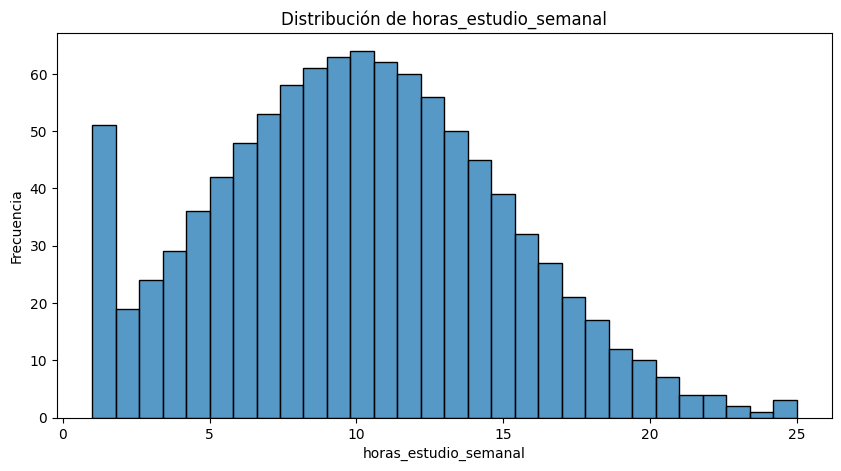

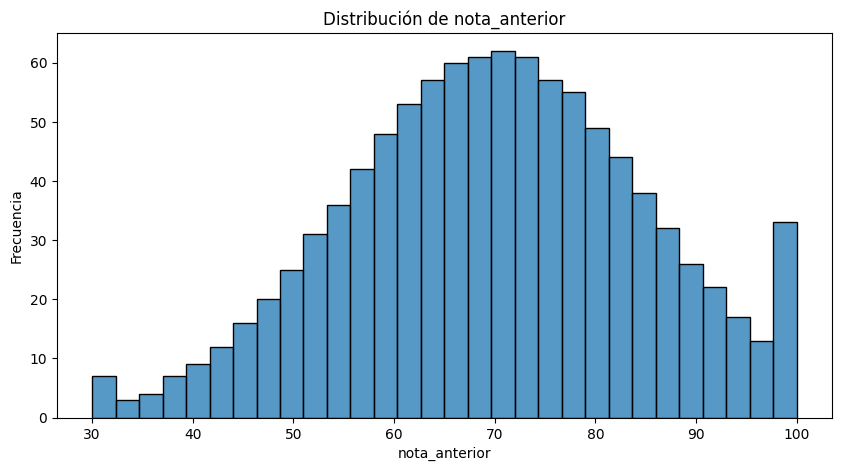

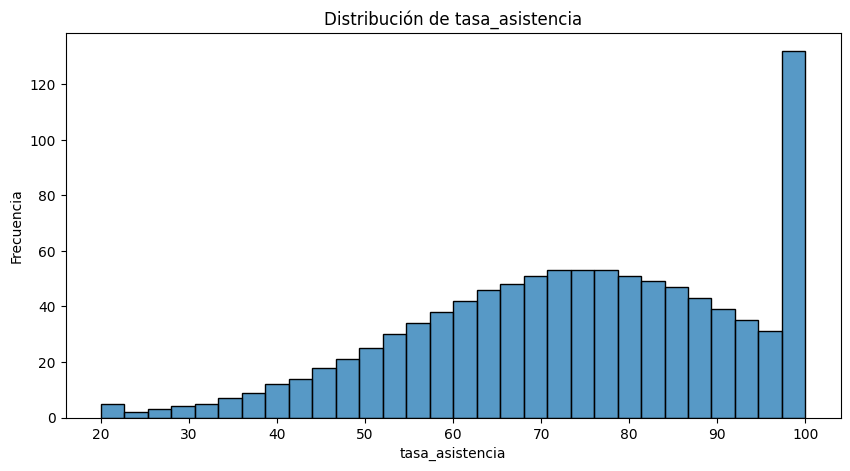

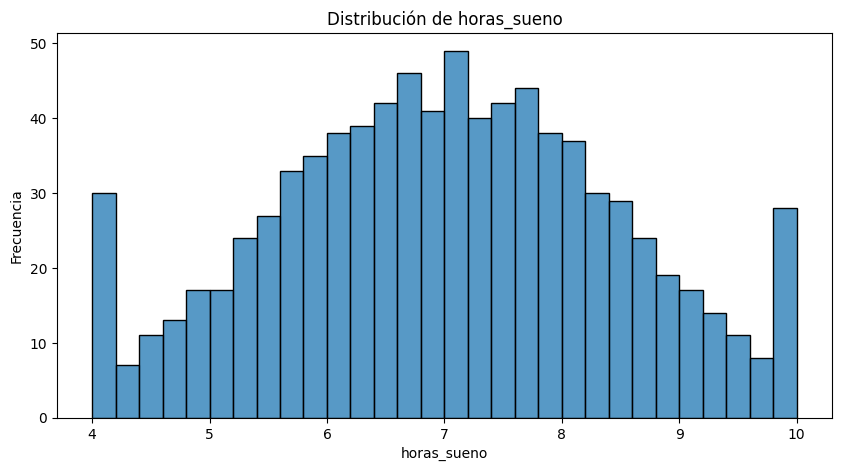

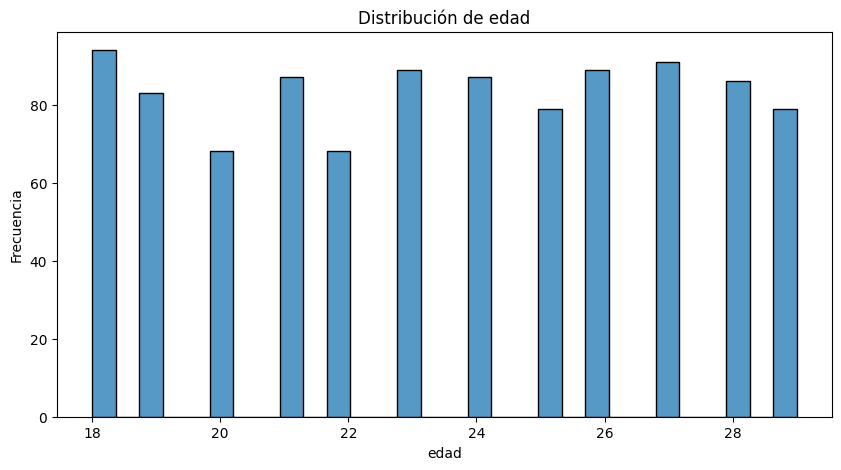

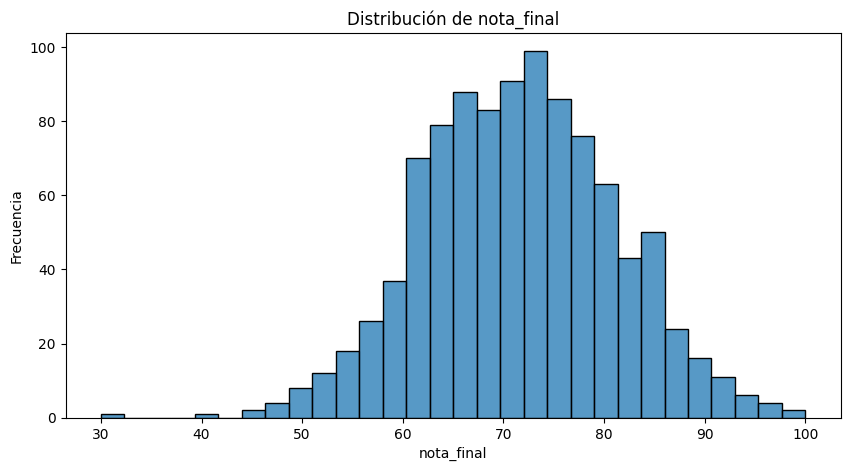

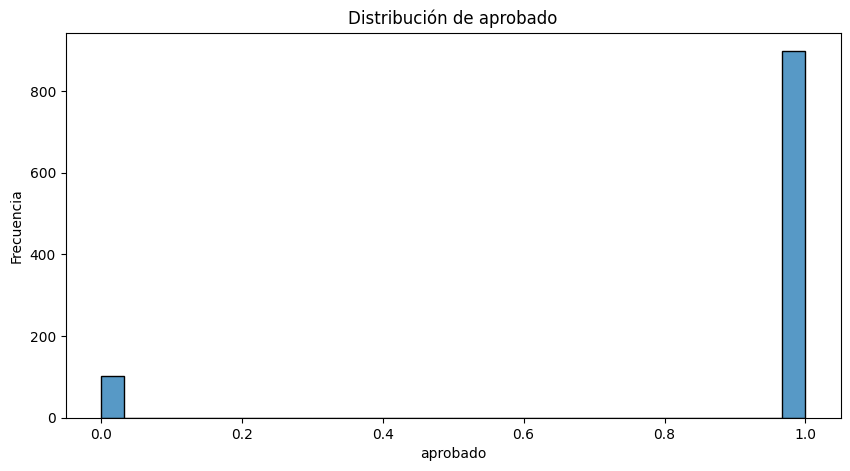

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

### MATRIZ DE CORRELACIONES

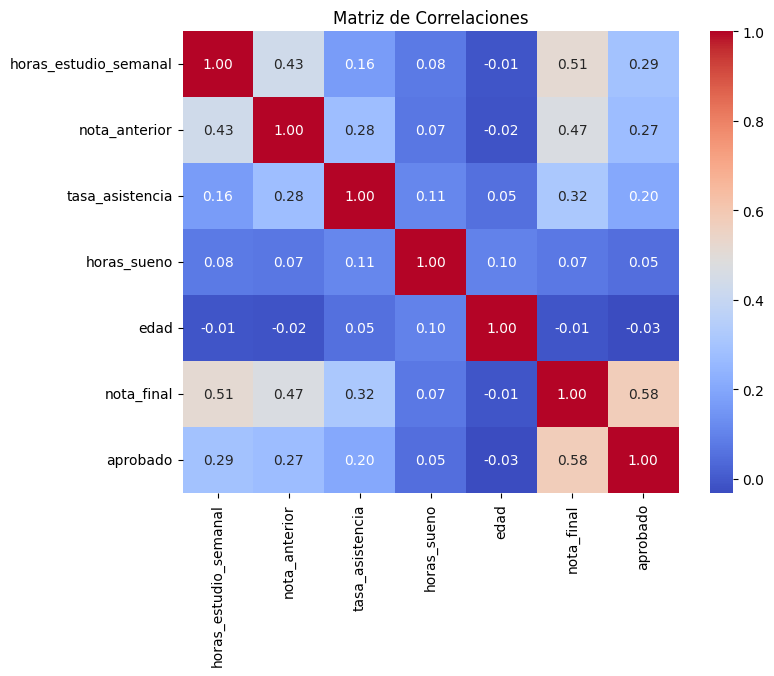

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()


## Variables categóricas


### Estadísticas descriptivas

In [29]:
df.describe(include = "object").T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


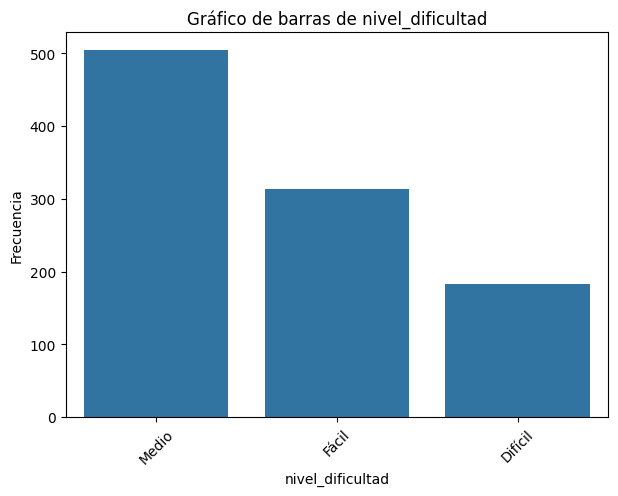

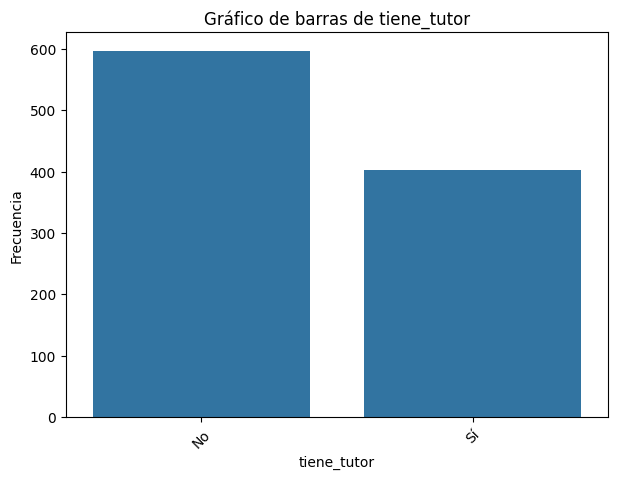

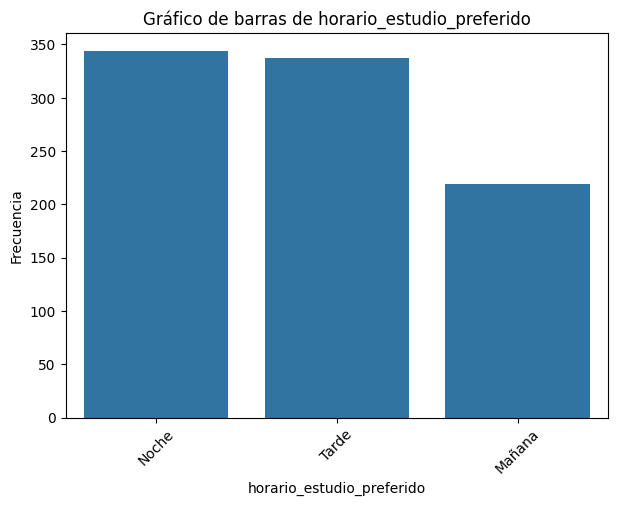

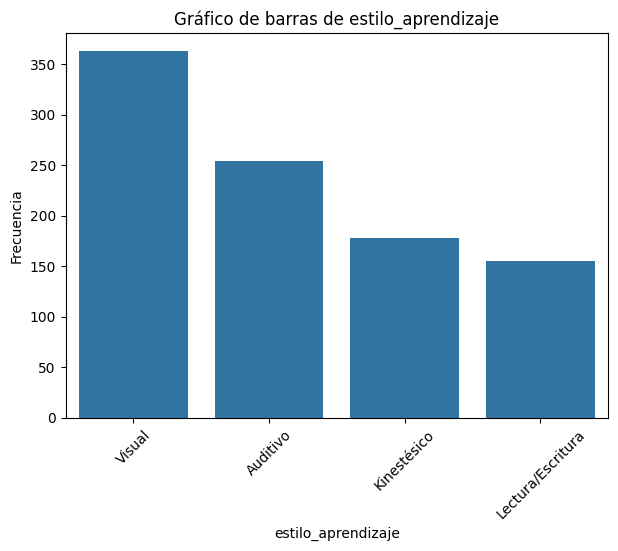

In [35]:
for col in cat_cols:
    num_categories = df[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5  # Altura fija

    plt.figure(figsize=(width, height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()